In [86]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import sklearn.metrics as m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [87]:
input_path = "../data/features_encoded.csv"
raw_data = pd.read_csv(input_path, header=0, skiprows=None, index_col=None, delimiter=",")

labels = raw_data['malicious'].apply(lambda x: 1 if x else 0)
features = raw_data.drop('malicious', axis=1)

train_features = features.iloc[:80000, :]
test_features = features.iloc[80000:, :]
train_labels = labels[:80000]
test_labels = labels[80000:]

In [88]:
def calculateNormalizationParams(data):
    means = data.mean()
    stdevs = data.std()
    stdevs[stdevs == 0] = 1  # Replace 0 std to avoid division by zero
    return means, stdevs

def applyNormalization(data, means, stdevs):
    return (data - means) / stdevs

In [89]:
means, stdevs = calculateNormalizationParams(train_features)
normalizedTrainFeatures = applyNormalization(train_features, means, stdevs)
normalizedTestFeatures = applyNormalization(test_features, means, stdevs)

In [90]:
best_k = 20
best_classifier = kmeans = KMeans(n_clusters=best_k,max_iter=10,init="random").fit(normalizedTrainFeatures)
prev_error = best_classifier.inertia_

In [91]:
def clusteringScore(data, k):
    global best_k,best_classifier,prev_error
    kmeans = KMeans(n_clusters=k, max_iter=10, init="random").fit(data)
    error = kmeans.inertia_
    if(error < prev_error):
        prev_error = error
        best_classifier = kmeans
        best_k = k
    return (k,kmeans.inertia_)

In [92]:
k_vector = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]
scores = [clusteringScore(normalizedTrainFeatures, k) for k in k_vector]
for i, score in enumerate(scores):
    print("k = %3d, WSSSE = %d" %(score[0], score[1]))

k =  20, WSSSE = 236127
k =  30, WSSSE = 189787
k =  40, WSSSE = 165731
k =  50, WSSSE = 141244
k =  60, WSSSE = 134308
k =  70, WSSSE = 126079
k =  80, WSSSE = 116346
k =  90, WSSSE = 107515
k = 100, WSSSE = 101251
k = 110, WSSSE = 100428
k = 120, WSSSE = 99953
k = 130, WSSSE = 92275
k = 140, WSSSE = 87200
k = 150, WSSSE = 86335
k = 160, WSSSE = 85296


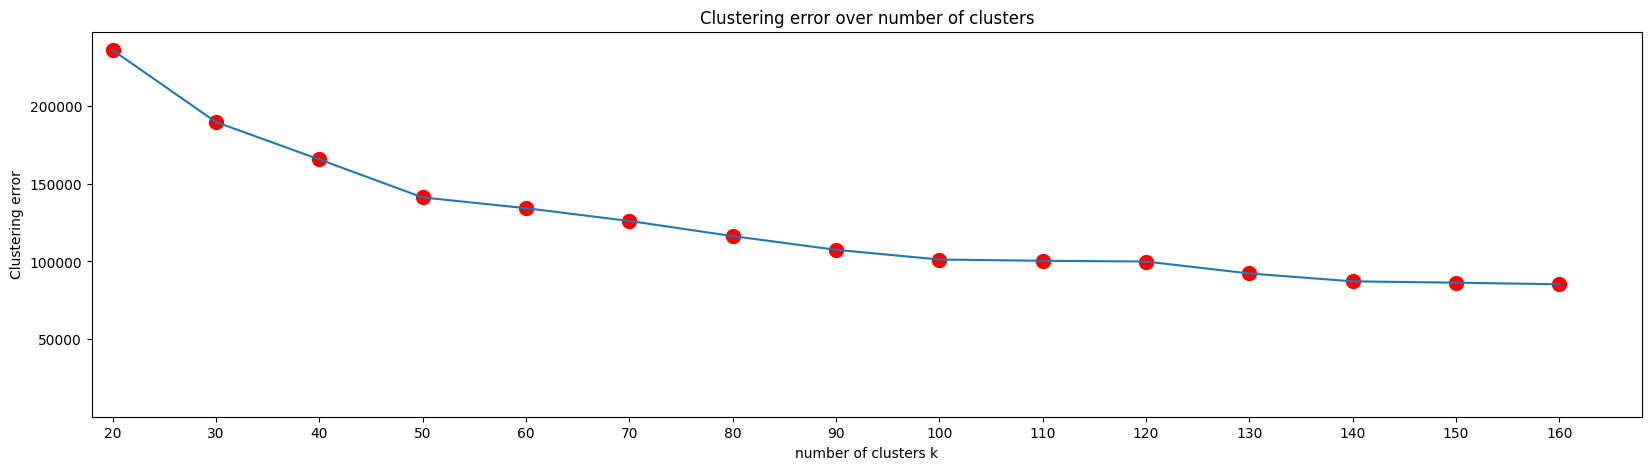

In [93]:
# plot results
plt.figure(figsize=(20,5))
_ = [_[1] for _ in scores]
plt.scatter(k_vector, _, color="r", s=100)
plt.plot(k_vector, _)
plt.axis([18, 1.05*np.max(k_vector), 0.85*np.min(scores), 1.05*np.max(scores)])
plt.xlabel("number of clusters k")
plt.ylabel("Clustering error")
plt.title("Clustering error over number of clusters")
plt.xticks(k_vector)
plt.show()

In [94]:
kmeans = best_classifier

In [95]:
sampled = normalizedTestFeatures.sample(replace=False, frac=0.01)
sampled

,length,extension,hostname,tld,isShortened,domainTokenCount,domainTokenLengthAvg,domainTokenLengthStdev,domainTokenLengthMax,pathTokenCount,pathTokenLengthAvg,pathTokenLengthStdev,pathTokenLengthMax
91423,0.377888,-0.645913,-0.644518,-0.136964,-0.025008,0.324974,0.138134,0.966059,1.017428,0.193592,-0.063944,-0.030872,-0.066820
90505,1.306742,-0.645913,-0.181200,-0.179423,-0.025008,0.324974,-0.153993,-0.625693,-0.342095,1.985921,-0.162460,-0.204125,-0.127219
83201,-1.185306,-0.645913,1.112707,-0.126350,-0.025008,-0.442946,-1.322503,-0.977419,-1.118965,-1.061039,-0.869531,-0.530012,-0.670808
80361,-0.324416,1.548177,-0.191642,-0.158194,-0.025008,-0.442946,0.649357,0.601827,0.434776,-0.702573,1.208036,1.829206,0.778763
89245,1.963736,-0.645913,-0.686556,-0.179423,-0.025008,0.324974,-1.322503,-1.109577,-1.118965,2.523620,-0.075604,-0.169872,-0.127219
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94525,-0.664241,-0.645913,-0.690967,-0.179423,-0.025008,-0.442946,-0.446121,-0.526206,-0.536312,-0.523340,-0.028611,0.309640,-0.006421
81689,-1.026721,-0.645913,-0.136461,0.096558,-0.025008,0.324974,-0.884312,-0.790521,-0.730530,-1.061039,-0.869531,-0.530012,-0.670808
85290,-0.664241,-0.645913,-0.690967,-0.179423,-0.025008,-0.442946,-0.446121,-0.526206,-0.536312,-0.523340,-0.028611,0.309640,-0.006421
94516,-0.415036,1.548177,0.823842,-0.083891,-0.025008,-0.442946,0.430262,-0.074993,0.046340,0.014359,-0.350140,-0.236292,-0.308415


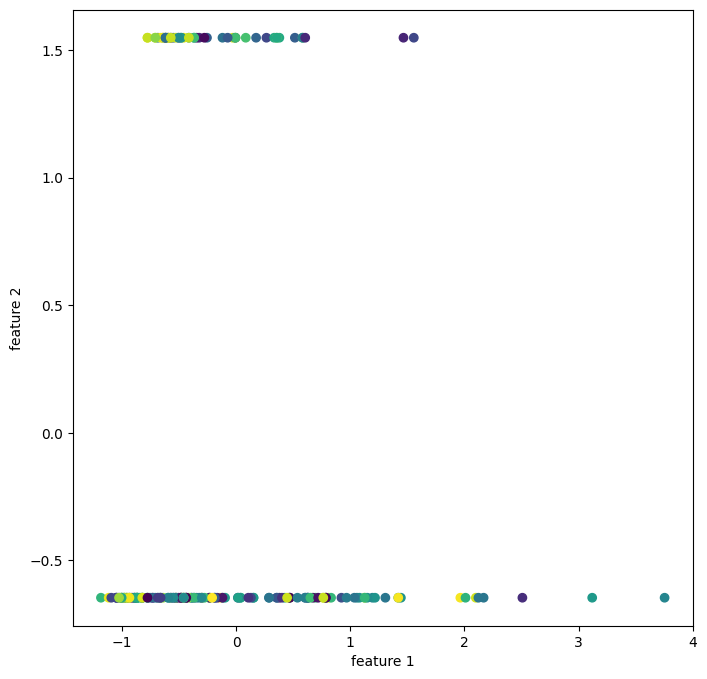

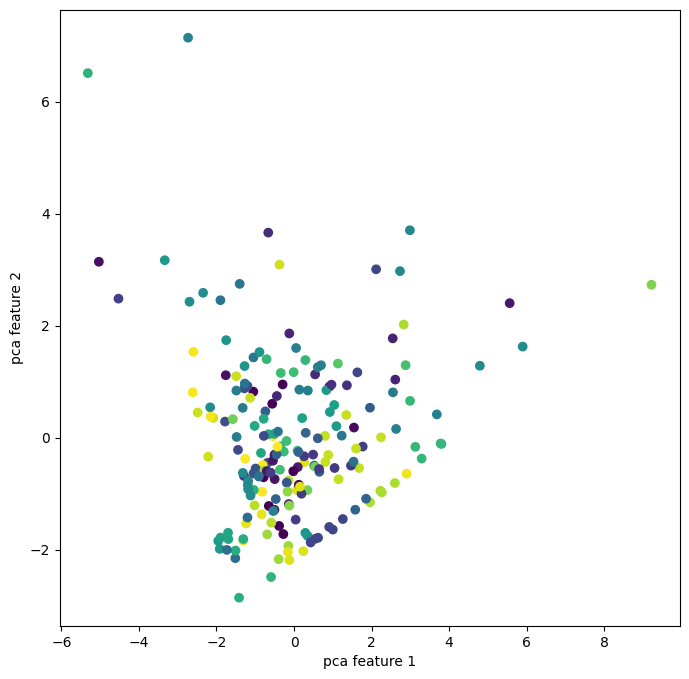

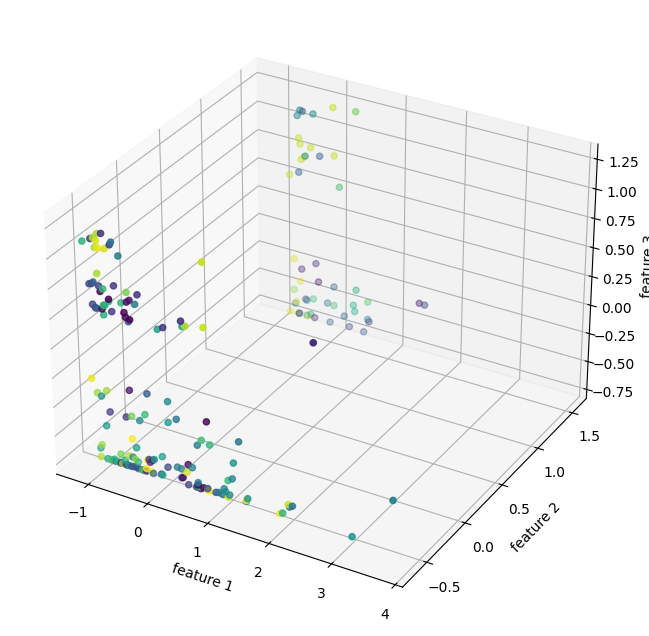

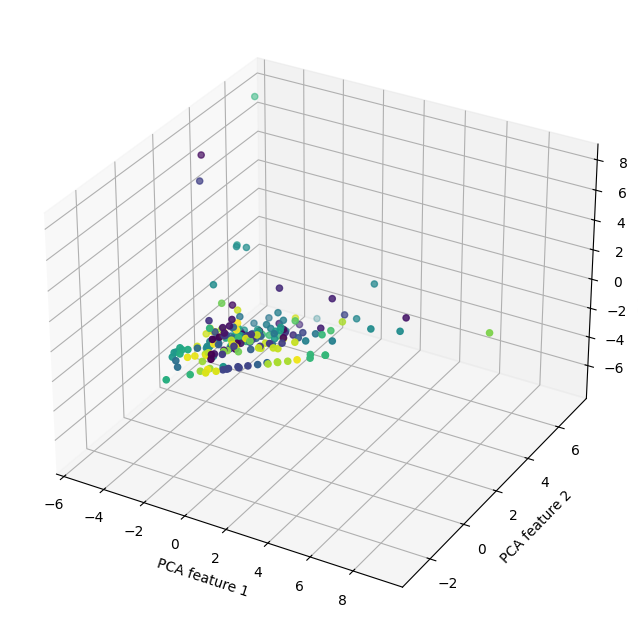

In [96]:
datax = sampled['length']
datay = sampled['extension']
dataz = sampled['hostname']
pcaData = pd.DataFrame(PCA(n_components=3).fit_transform(sampled))
labels_ = kmeans.predict(sampled)

#non-pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(datax, datay, c=labels_)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

#pca 2d plot
fig = plt.figure(1, figsize=(8, 8))
plt.scatter(pcaData[0], pcaData[1], c=labels_)
plt.xlabel('pca feature 1')
plt.ylabel('pca feature 2')
plt.show()

#non-pca cluster plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(datax, datay, dataz, c=labels_)
ax.set_xlabel('feature 1')
ax.set_ylabel('feature 2')
ax.set_zlabel('feature 3')
plt.show()

#pca plot
fig = plt.figure(1, figsize=(8, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(pcaData[0], pcaData[1], pcaData[2],c=labels_)
ax.set_xlabel('PCA feature 1')
ax.set_ylabel('PCA feature 2')
ax.set_zlabel('PCA feature 3')
plt.show()

In [97]:
i = 0
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1)-np.array(p2))
def error(prediction, point):
    global i
    closest_center = kmeans.cluster_centers_[prediction[i]]
    i += 1
    return euclidean_distance(closest_center, point)

In [98]:
predictions = kmeans.predict(normalizedTestFeatures)
# ordered = normalizedTestFeatures.apply(lambda x : (error(predictions, x), x), axis=1).sort_values(key=0, ascending=False)
predictions

array([114,  45,  50, ..., 132, 157,  66])

In [99]:
# xx = [x[0] for x in ordered]
# plt.figure(figsize=(20,30))
# plt.subplot(4,1,1)
# plt.plot(xx)
# plt.title("points with largest distance from cluster centers")
# plt.ylabel("distance from center")
# 
# plt.subplot(4,1,2)
# plt.plot(xx[:3000])
# plt.ylabel("distance from center")
# plt.xlabel("i-th most distant point")
# plt.ylim(0,100000)
# 
# plt.subplot(4,1,3)
# plt.plot(xx[:100])
# plt.ylabel("distance from center")
# 
# plt.subplot(4,1,4)
# plt.plot(xx[:50])
# plt.ylabel("distance from center")
# plt.xlabel("i-th most distant point")
# plt.show()

In [100]:
# thresholds = [500, 100, 50, 25, 10, 5, 1]
# t_count = [len([__ for __ in xx if __ > _]) for _ in thresholds]
# 
# plt.figure(figsize=(20,8))
# plt.scatter(thresholds, t_count, c="r", s=100)
# plt.plot(thresholds, t_count)
# plt.yticks(t_count)
# plt.xticks(thresholds)
# plt.ylim(-50, np.max(t_count)*1.1)
# plt.xlim(0, np.max(thresholds)*1.01)
# plt.show()
# 
# for i in range(len(thresholds)):
#     print("Threshold: %10d\tanomalous connections: %5d" %(thresholds[i], t_count[i]))

In [101]:
homogeneity = m.homogeneity_score(test_labels,predictions)
completeness = m.completeness_score(test_labels,predictions)
v_measure = m.v_measure_score(test_labels,predictions)
print("Homogeneity score: " + str(homogeneity))
print("Completeness score: " + str(completeness))
print("V-Measure score: " + str(v_measure))

Homogeneity score: 0.14125416804609386
Completeness score: 0.01966001383452033
V-Measure score: 0.034516024200156904


In [102]:
test_labels

80000     0
80001     0
80002     1
80003     1
80004     0
         ..
99996     1
99997     0
99998     0
99999     0
100000    1
Name: malicious, Length: 20001, dtype: int64

In [103]:
pred2label = {}
for i in range(0,len(predictions)):
    if not str(predictions[i]) in pred2label:
        # print("Adding item " + str(predictions[i]) + " to dict with value " + str(test_labels.iloc[i]))
        pred2label.update({str(predictions[i]):{str(test_labels.iloc[i]):1}})
        # print("New dict: " + str(pred2label))
    elif not str(test_labels.iloc[i]) in pred2label[str(predictions[i])]:
        # print("Updating cluster " + str(predictions[i]))
        # print("New Label: " + str(test_labels.iloc[i]))
        pred2label[str(predictions[i])].update({str(test_labels.iloc[i]):1})
    else:
        # print("Updating cluster " + str(predictions[i]))
        # print("Label: " + str(test_labels.iloc[i]))
        cur = int(pred2label[str(predictions[i])][str(test_labels.iloc[i])])
        pred2label[str(predictions[i])][str(test_labels.iloc[i])] = str(cur + 1)
for cluster in pred2label:
    # print("Cluster: " + cluster)
    bcount = int(pred2label[cluster]["0"]) if "0" in pred2label[cluster] else 0
    mcount = int(pred2label[cluster]["1"]) if "1" in pred2label[cluster] else 0
    if bcount > mcount:
        pred2label[cluster]["label"] = 0
        pred2label[cluster]["probability"] = float(bcount)/float(bcount+mcount)
    else:
        pred2label[cluster]["label"] = 1
        pred2label[cluster]["probability"] = float(mcount)/float(bcount+mcount)
    # print("Label: " + str(pred2label[cluster]["label"]))

In [104]:
def getLabel(x):
    return pred2label[str(x)]["label"]
predictions = [getLabel(x) for x in predictions]
def getProb(x):
    return pred2label[str(x)]["probability"]
probs = [getProb(x) for x in predictions]

In [105]:
acc = m.accuracy_score(test_labels, predictions)
prec = m.precision_score(test_labels, predictions)
recall = m.recall_score(test_labels, predictions)
f1 = m.f1_score(test_labels,predictions)
auc = m.roc_auc_score(test_labels,probs)
print("Accuracy score: " + str(acc))
print("Precision score: " + str(prec))
print("Recall score: " + str(recall))
print("F1 score: ", f1)
print("AUC-ROC: ", auc)

Accuracy score: 0.6897155142242888
Precision score: 0.6949411251635412
Recall score: 0.39867400550412807
F1 score:  0.506677265500795
AUC-ROC:  0.6410793197338246


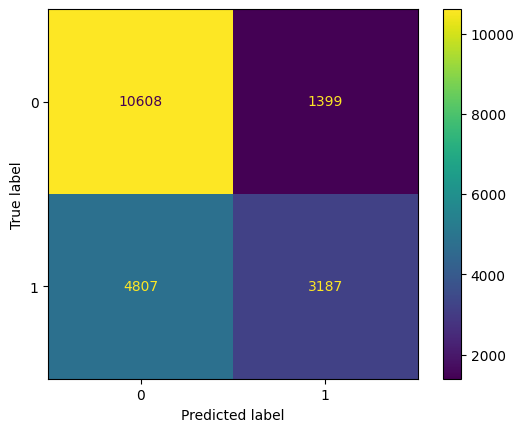

In [106]:
m.ConfusionMatrixDisplay(m.confusion_matrix(test_labels, predictions)).plot()

In [107]:
import pickle
with open('trained_models/kmeans.pkl','wb') as f:
    pickle.dump(kmeans,f)
print("Model dump complete!")

Model dump complete!
